In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Temperatures=pd.read_csv("Measure_data.csv")
Electric_energy=pd.read_csv("Pressure_data_40min.csv")

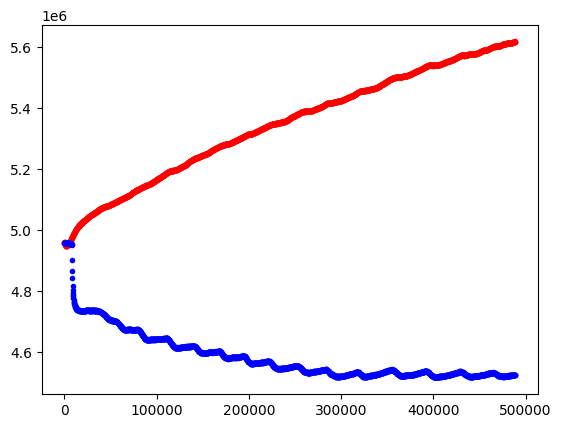

In [83]:
#calculating the whole energy
energy=Electric_energy["I(A)"]*Electric_energy["U(V)"]*60
all_energy=energy.sum()
#CHANNEL0 for the hot reservoir
plt.scatter(np.linspace(0, all_energy, 2400), (Temperatures["CHANNEL0"]+273.15)*4*4182, marker=".", color="red")
plt.scatter(np.linspace(0, all_energy, 2400), (Temperatures["CHANNEL4"]+273.15)*4*4182, marker=".", color="blue")
plt.show()

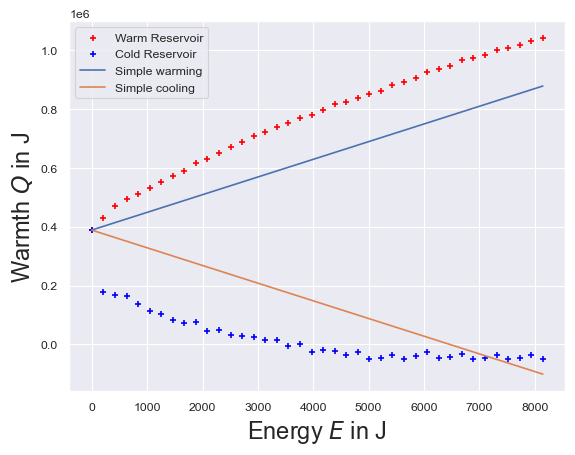

In [23]:
temps_hot=[]
for i in range(40):
    temps_hot.append(Temperatures["CHANNEL0"][60*i]*4*4182)
temps_hot=np.array(temps_hot)

temps_cold=[]
for i in range(40):
    temps_cold.append(Temperatures["CHANNEL4"][60*i]*4*4182)
temps_cold=np.array(temps_cold)

energy=Electric_energy["I(A)"]*Electric_energy["U(V)"]
all_energy=energy.sum()

sns.set_theme(style="darkgrid")
sns.set_context("paper")
plt.scatter(np.linspace(0, all_energy, 40), temps_hot, marker="+", color="red", label="Warm Reservoir")
plt.scatter(np.linspace(0, all_energy, 40), temps_cold, marker="+", color="blue", label="Cold Reservoir")

x=np.linspace(0, all_energy, 40)
def myfunction(x):
  return 60 * x + Temperatures["CHANNEL0"][0]*4*4182
  #60 because we are actually having to work with the intervalls of 60 seconds

def myfunction2(x):
  return -60 * x + Temperatures["CHANNEL4"][0]*4*4182

mymodel = list(map(myfunction, x))
plt.plot(x, mymodel, label="Simple warming")

mymodel = list(map(myfunction2, x))
plt.plot(x, mymodel, label="Simple cooling")

plt.xlabel("Energy $E$ in J", size=17)
plt.ylabel("Warmth $Q$ in J", size=17)
plt.legend()
#plt.savefig("Warmth_energy.png", dpi=500, bbox_inches="tight")
plt.show()